# Computer Vision Assignments: Sessions 1 & 2

This notebook contains tasks and assignments based on Sessions 1 and 2. You are required to implement the functions and complete the exercises as described. Use OpenCV and other necessary libraries like NumPy and Matplotlib.

**Instructions:**
- Complete each task in the provided code cells.
- Test your implementations with sample images (e.g., download test images [here](https://sipi.usc.edu/database/database.php?volume=misc) or [here](https://www.hlevkin.com/hlevkin/06testimages.htm) or use your own test images).
- Include comments in your code for clarity.
- Display results using cv2.imshow() or Matplotlib where appropriate.
- Submit the completed notebook along with any output images or explanations on [our google drive for the CV sessions](https://drive.google.com/drive/folders/1IjVhJmAXxNQTGT-ybJ-yc5smYtR5v8CO?usp=sharing) **upload your files in a new folder under your name**

## Session 1: Basic Image Operations (Reading, Resizing, Cropping, Rotating)

### Task 1: Read and Display an Image
Read an image from a file and display it in both BGR and grayscale formats. Handle errors if the image cannot be read.

In [8]:
import cv2 as cv
import numpy as np
import sys
import matplotlib.pyplot as plt
%matplotlib inline

# Your code here
BGR_img=cv.imread('images/tree.jpg')
# Read in BGR
cv.imshow('tree',BGR_img) 
cv.waitKey(0) 
cv.destroyAllWindows()
# Read in Grayscale
img=cv.imread('images/tree.jpg',0)
cv.imshow('gray tree',img) 
cv.waitKey(0) 
cv.destroyAllWindows()
# Display both using cv.imshow() or plt.imshow()

### Task 2: Resize Image with Aspect Ratio Preservation
Implement resizing while preserving aspect ratio. Downscale to 60% and upscale to 200%. Compare shapes and display originals vs resized.

In [9]:
# Your code here
# Load image
 
cv.imshow("OG",img)
cv.waitKey(2000)
cv.destroyAllWindows()
h,w,_ = img.shape
# Downscale to 60%
down_percent=60
new_h=int((down_percent *h)/100)
new_w=int((down_percent *w)/100)
dim=(new_h,new_w)
down_img=cv.resize(img,dim,interpolation = cv.INTER_AREA)
cv.imshow("Down Scaled image ", down_img)
cv.waitKey(2000)
cv.destroyAllWindows()
# Upscale to 200%
up_percent=200
neww_h=int((up_percent *h)/100)
neww_w=int((up_percent *w)/100)
dim=(neww_h,neww_w)
up_img=cv.resize(img,dim,interpolation = cv.INTER_AREA)
cv.imshow("up Scaled image ", up_img)
cv.waitKey(2000)
cv.destroyAllWindows()
# Display all three
##### there wAs a problem here in opencv the scales are right but in this function the up scaled and down scaled is the same
#def displayThree(img1,img2,img3,title1='OG',title2='Down-scale',title3='up-scale'):
#     fig = plt.figure(figsize=(16, 16))
#     fig.add_subplot(1,3,1)
#     plt.imshow(img1)
#     plt.title(title1)
#     plt.axis("off")
#     fig.add_subplot(1,3,2)
#     plt.imshow(img2)
#     plt.title(title2)
#     plt.axis("off")
#     fig.add_subplot(1,3,3)
#     plt.imshow(img3)
#     plt.title(title3)
#     plt.axis("off")
# displayThree(img,down_img,up_img)


ValueError: not enough values to unpack (expected 3, got 2)

### Task 3: Resize Without Preserving Aspect Ratio
Resize only width to 100 pixels, only height to 200 pixels, and both to (200, 200). Display and discuss distortions.

In [ ]:
# Your code here
dim=(100,200)
img1=cv.resize(img,dim,interpolation = cv.INTER_AREA)
cv.imshow("image1", img1)
cv.waitKey(2000)
cv.destroyAllWindows()
dim=(200,200)
img2=cv.resize(img,dim,interpolation = cv.INTER_AREA)
cv.imshow("image2", img2)
cv.waitKey(2000)
cv.destroyAllWindows()

### Task 4: Resize Using Scale Factors (fx, fy)
Scale up by 1.2 in both directions and down by 0.6. Use different interpolations (INTER_LINEAR, INTER_NEAREST) and compare quality.

In [ ]:
# Your code here
scale_up=1.2
scale_down=0.6
img_down=cv.resize(img,None,fx=scale_down,fy=scale_down,interpolation=cv.INTER_LINEAR)
cv.imshow('scaled down img',img_down)
cv.waitKey(2000)
img_up=cv.resize(img,None,fx=scale_up,fy=scale_up,interpolation=cv.INTER_NEAREST)
cv.imshow('scaled up img',img_up)
cv.waitKey(2000)
cv.destroyAllWindows()
# Experiment with interpolations

### Task 5: Cropping an Image
Crop a region (e.g., [20:200, 50:200]) from the image. Display original and cropped.

In [ ]:
# Your code here
cv.imshow('tree',img) 
cv.waitKey(0) 
cv.destroyAllWindows()
imgCropped=img[20:300,50:200]
cv.imshow('Cropped img',imgCropped)
cv.waitKey(2000)
cv.destroyAllWindows()

### Task 6: Advanced Cropping - Patch Image into Blocks
Divide the image into 4 equal blocks (2x2 grid) by cropping. Display each block separately and then stitch them back using NumPy concatenation to verify.

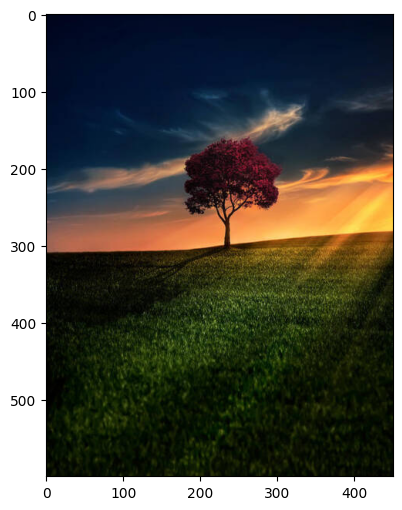

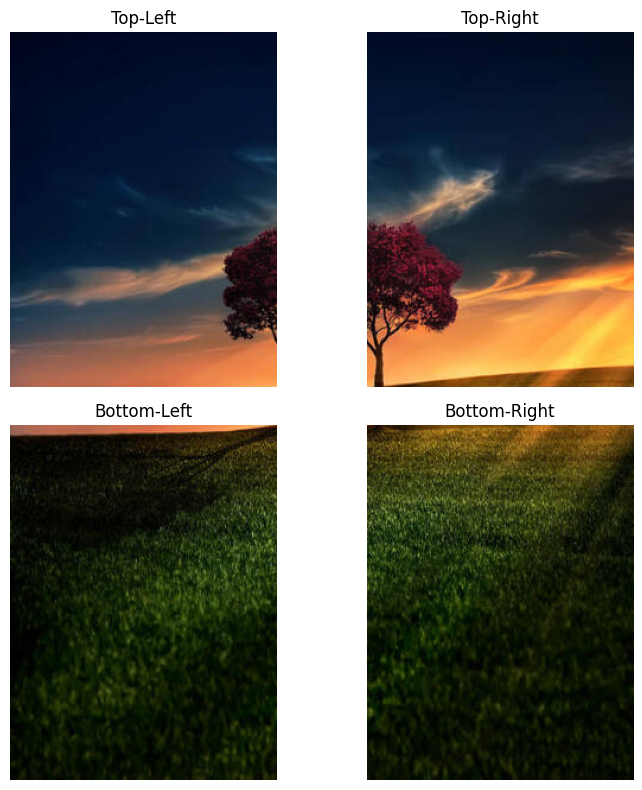

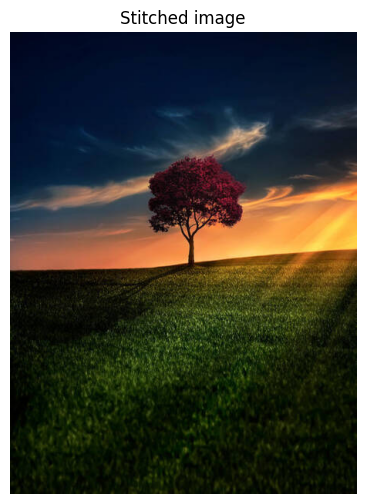

In [ ]:
# Your code here
fig, ax = plt.subplots(figsize=(6,6)) # display it to crop right
img=cv.cvtColor(img,cv.COLOR_BGR2RGB) 
ax.imshow(img)
# Calculate midpoints for height and width
h,w, _=img.shape
h_mid,w_mid=int(h/2),int(w/2)
# Crop into top-left, top-right, bottom-left, bottom-right
top_left=img[0:h_mid,0:w_mid]
top_right=img[0:h_mid,w_mid:w]
bottom_left=img[h_mid:h,0:w_mid]
bottom_right=img[h_mid:h,w_mid:w]
# Display each
blocks=[top_left,top_right,bottom_left,bottom_right]
titles=['Top-Left','Top-Right','Bottom-Left','Bottom-Right']
fig,axs=plt.subplots(2,2,figsize=(8,8))
for i, ax in enumerate(axs.flat):
    ax.imshow(blocks[i])
    ax.set_title(titles[i])
    ax.axis('off')

plt.tight_layout()
plt.show()
# Stitch back (use np.hstack and np.vstack)
top=np.hstack((top_left, top_right))
bottom=np.hstack((bottom_left,bottom_right))
stitched_fig=np.vstack((top, bottom))
plt.figure(figsize=(6,6))
plt.imshow(stitched_fig)
plt.title("Stitched image")
plt.axis('off')
plt.show()

### Task 7: Rotating an Image
Rotate the image by 45°, 90°, and 180° using getRotationMatrix2D and warpAffine. Display all rotations.

In [ ]:
# Your code here
# Calculate center
height,width,_= img.shape
center=(width/2, height/2)
# For each angle: get matrix, warp, display
rotate_matrix=cv.getRotationMatrix2D(center=center,angle=45,scale=1)
rotated_img=cv.warpAffine(src=img,M=rotate_matrix,dsize=(height,width))
cv.imshow("Rotated image 45 ", rotated_img)
cv.waitKey(2000)
cv.destroyAllWindows()
rotate_matrix=cv.getRotationMatrix2D(center=center,angle=90,scale=1)
rotated_img=cv.warpAffine(src=img,M=rotate_matrix,dsize=(height,width))
cv.imshow("Rotated image 90 ", rotated_img)
cv.waitKey(2000)
cv.destroyAllWindows()
rotate_matrix=cv.getRotationMatrix2D(center=center,angle=180,scale=1)
rotated_img=cv.warpAffine(src=img,M=rotate_matrix,dsize=(height,width))
cv.imshow("Rotated image 180 ", rotated_img)
cv.waitKey(2000)
cv.destroyAllWindows()


### Task 8: Rotate with Scaling
Rotate by 45° and scale by 0.5 in **one** operation. Compare with separate resize and rotate.

In [ ]:
# Your code here
rotate_matrix=cv.getRotationMatrix2D(center=center,angle=45,scale=0.5)
rotated_img=cv.warpAffine(src=img,M=rotate_matrix,dsize=(height,width))
cv.imshow("Rotated image 45 and scaled", rotated_img)
cv.waitKey(2000)
cv.destroyAllWindows()

## Session 2: Image Acquisition, Formats, Color Spaces, Enhancement, and Filtering

### Task 9: Read Image in Different Color Spaces
Read an image in BGR, convert to RGB (for Matplotlib), HSV, LAB and Grayscale. Display all.

In [ ]:
# Your code here
# Use cv.cvtColor()
img=cv.imread('images/tree.jpg')
rgb_image=cv.cvtColor(img,cv.COLOR_BGR2RGB) 
HSV_image=cv.cvtColor(img,cv.COLOR_BGR2HSV)
lab_image=cv.cvtColor(img,cv.COLOR_BGR2LAB)
gray_image=cv.cvtColor(img,cv.COLOR_BGR2GRAY)
cv.imshow('rgb',rgb_image)
cv.waitKey(2000)
cv.destroyAllWindows()
cv.imshow('HSv',HSV_image)
cv.waitKey(2000)
cv.destroyAllWindows()
cv.imshow('lab',lab_image)
cv.waitKey(2000)
cv.destroyAllWindows()
cv.imshow('gray',gray_image)
cv.waitKey(2000)
cv.destroyAllWindows()

### Task 10: Image Sharpening
Apply cv2.blur() with a 5x5 kernel, then use cv2.filter2D() with sharpening kernels of varying strengths (e.g., [[0, -1, 0], [-1, 5, -1], [0, -1, 0]] and [[0, -2, 0], [-2, 9, -2], [0, -2, 0]]).
Compare between original and sharpened image after blurring.

In [ ]:
# Your code here
# Use cv2.blur
img=cv.imread('images/tree.jpg')
img=cv.cvtColor(img,cv.COLOR_BGR2RGB)
blurimg=cv.blur(img, ksize=(5,5)) #cv.blur() automatically creates the normalized kernel for you
cv.imshow("avg image", blurimg)
cv.waitKey(2000)
cv.destroyAllWindows()
# Define sharpen kernel, use cv.filter2D()
# Step 2: Define sharpening kernels
kernel1=np.array([[0,-1,0],
                    [-1,5,-1],
                    [0,-1,0]])
kernel2=np.array([[0,-2,0],
                    [-2,9,-2],
                    [0,-2,0]])
# Step 3: Apply filter2D with both kernels
sharp1=cv.filter2D(blurimg, -1, kernel1)
cv.imshow("sharp image 1",sharp1)
cv.waitKey(2000)
cv.destroyAllWindows()
sharp2 = cv.filter2D(blurimg, -1, kernel2)
cv.imshow("sharp image 2", sharp2) # that have more details and sharpp more than the other
cv.waitKey(2000)
cv.destroyAllWindows()

### Task 11: Add Salt and Pepper Noise to Image
Implement a function to add salt and pepper noise to an image. Control noise density (e.g., 0.05).

(<Figure size 640x480 with 1 Axes>,
 Text(0.5, 1.0, 'Mean Filter'))

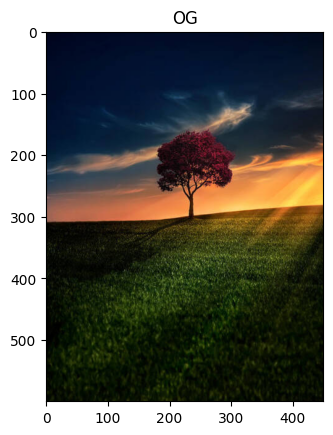

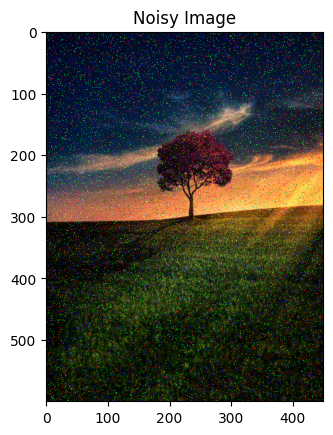

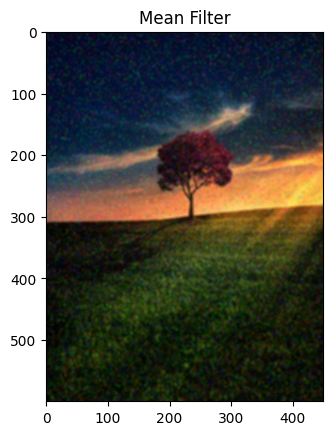

In [16]:
from skimage.util import random_noise
# Read original image (color)
img=cv.imread('images/tree.jpg',1)
img=cv.cvtColor(img, cv.COLOR_BGR2RGB)
plt.figure(), plt.imshow(img), plt.title('OG')
sp=cv.imread('images/sp_noise.png', 1)
# Add salt & pepper noise with density 0.05
noisyImg=random_noise(img, mode="s&p", amount=0.05)
noisyImg=np.array(255*noisyImg,dtype="uint8")
plt.figure(), plt.imshow(noisyImg), plt.title('Noisy Image')
mean_filter=cv.blur(noisyImg, (5,5))
plt.figure(), plt.imshow(mean_filter), plt.title('Mean Filter')


### Task 12: Remove Salt and Pepper Noise Using Median Filter
Apply cv.medianBlur() to a noisy image. Experiment with kernel sizes (3,5,7) and compare results.

(<Figure size 640x480 with 1 Axes>,
 Text(0.5, 1.0, 'Median Filter7'))

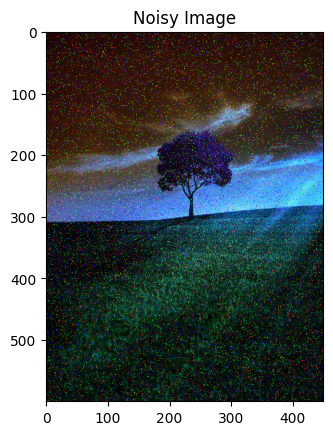

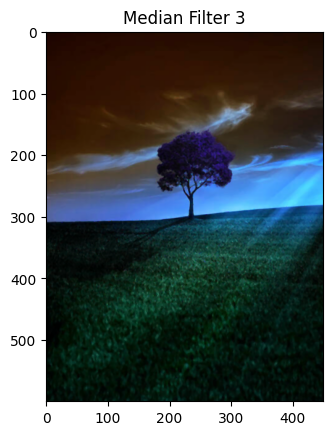

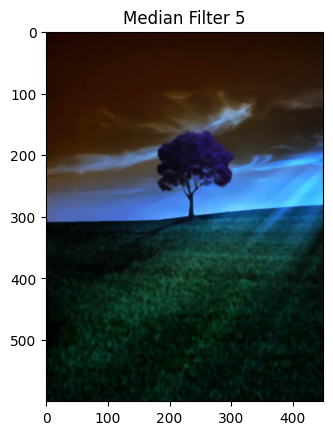

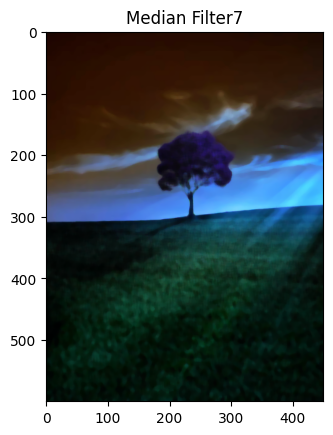

In [18]:
# Your code here
noisyImg=random_noise(img, mode="s&p", amount=0.05)
noisyImg=np.array(255*noisyImg, dtype="uint8")
plt.figure(), plt.imshow(noisyImg[:,:,::-1]), plt.title('Noisy Image')
#k=3
mean_filter3 = cv.medianBlur(noisyImg, 3)
plt.figure(), plt.imshow(mean_filter3[:,:,::-1]), plt.title('Median Filter 3')

#k=5
mean_filter5=cv.medianBlur(noisyImg, 5)
plt.figure(),plt.imshow(mean_filter5[:,:,::-1]), plt.title('Median Filter 5')

#k=7
mean_filter7=cv.medianBlur(noisyImg, 7)
plt.figure(),plt.imshow(mean_filter7[:, :, ::-1]), plt.title('Median Filter7')

### Task 13: Implement Adaptive Median Filter
Write a custom function for adaptive median filtering. It should dynamically increase window size until noise is removed or max size is reached. Apply to a noisy image and compare with standard median.

In [ ]:
# Your code here
#i couldnt do it for now i am gonna upload another file with these tasks completeddd
def adaptive_median_filter(image, max_size=7):
    # Implement logic: for each pixel, start with small window, increase if needed
    pass

# Test on noisy image

### Task 14: Implement Bilateral Filter Function
Write a Python function to perform bilateral filtering on an image. Use Gaussian weights for both spatial and intensity. Parameters: diameter, sigma_color, sigma_space. Compare with cv.bilateralFilter().

In [ ]:
# Your code here
def custom_bilateral_filter(image, diameter, sigma_color, sigma_space):
    # Implement using nested loops or vectorized (efficiently)
    # For each pixel, compute weighted sum based on distance and intensity diff
    pass

# Apply to image, display, and compare with OpenCV's version

### [BONUS] Task 15: Comprehensive Camera Task
Combine: Live camera feed -> grayscale -> add noise -> remove with median -> sharpen. Display all stages in separate windows.

In [ ]:
# To read video from camera example:

camera_id = 0
delay = 400
window_name = 'frame'

cap = cv.VideoCapture(camera_id)

if not cap.isOpened():
    sys.exit()

while cap.isOpened():
    ret, frame = cap.read()
    if not ret:
        break

    cv.imshow(window_name, frame)
    if cv.waitKey(delay) & 0xFF == ord('q'):
        break

cap.release()
cv.destroyWindow(window_name)


# Your code here

### [BONUS]Task 16: Comprehensive Video Task
Similar to Task 18 but for a video file. Save the final processed video.

In [ ]:
# Your code here

### Task 17: Performance Comparison
Time the execution of standard median vs adaptive median on a large noisy image. Discuss when adaptive median filter is better.

In [ ]:
import time
# Your code here
# Use time.time() to measure